# Diabetes Disease Prediction
## Weekly Assignment 2
## Computer Vision Bootcamp Batch 2 Indonesia AI




## Domain Understanding

## Data understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense


In [2]:
plt.style.use('seaborn')

<ipython-input-2-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTWGhbzN2M4-3cEhd5JUwkSip2F6z59yAOp0YZoaIlQl4MZv4R6auLV3u6EV4lPzq73MoxdjnxAqu_o/pub?output=csv'
df_diabetes = pd.read_csv(url, names=['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])
df_diabetes.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,627.000,50,1
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_diabetes.shape

(768, 9)

In [5]:
df_diabetes.describe()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,381.86224,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,237.65830,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00100,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,207.00000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,326.00000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,547.50000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,997.00000,81.000000,1.000000


In [6]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   preg_times      768 non-null    int64  
 1   glucose         768 non-null    int64  
 2   blood_press     768 non-null    int64  
 3   skin_thickness  768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   pedigree        768 non-null    float64
 7   age             768 non-null    int64  
 8   class           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<ipython-input-7-9d81c8014f2c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_diabetes['age'])


<Axes: xlabel='age', ylabel='Density'>

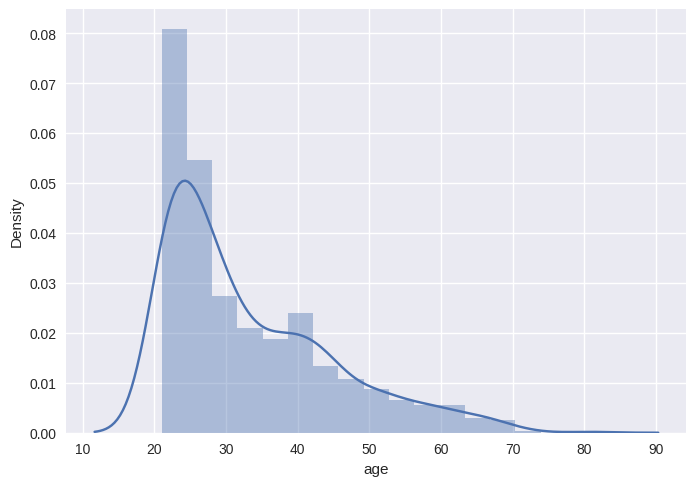

In [7]:
sns.distplot(df_diabetes['age'])

## Data Cleaning & Analysis

In [8]:
# Cek missing value
df_diabetes.isna().sum()

preg_times        0
glucose           0
blood_press       0
skin_thickness    0
insulin           0
BMI               0
pedigree          0
age               0
class             0
dtype: int64

Note :
* Data parameter diabetes terdiri dari 768 baris, 8 kolom prediktor medis dan 1 kolom target bernama Outcome.
* Tidak terdapat missing value.

### Visualization for Machine Learning Insight

In [9]:
# Buat dataframe baru untuk visualisasi EDA

# Copy dataframe dari df_diabet
df_eda = df_diabetes.copy()

# Kolom Class, 0 = Sehat, 1 = Diabetes
df_eda['class'] = df_eda['class'].replace(0, 'Sehat')
df_eda['class'] = df_eda['class'].replace(1, 'Diabetes')
df_eda.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,627.000,50,Diabetes
1,1,85,66,29,0,26.6,351.000,31,Sehat
2,8,183,64,0,0,23.3,672.000,32,Diabetes
3,1,89,66,23,94,28.1,167.000,21,Sehat
4,0,137,40,35,168,43.1,2.288,33,Diabetes


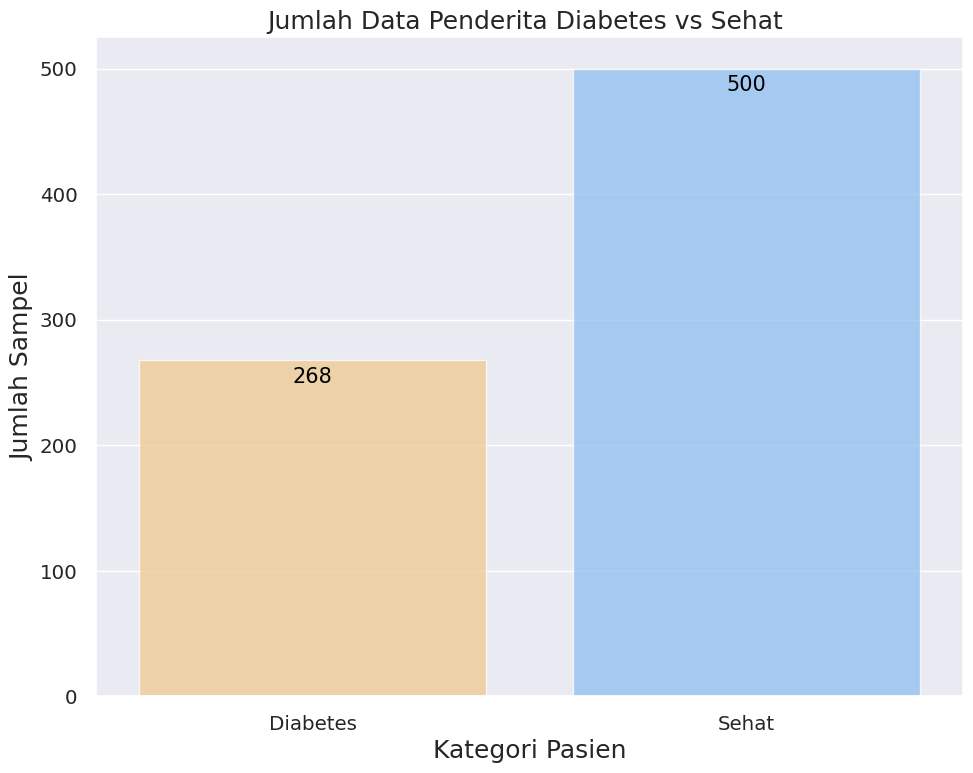

In [10]:
# Membuat pallet warna sendiri
cols= ["#ffcc80", "#80bfff"]


# Memvisualisasikan jumlah pasien sehat vs diabetes
plt.figure(figsize=(10,8))
sns.set(font_scale=1.3)
g_count = sns.countplot(x='class', alpha=0.75, palette = cols, data = df_eda)
plt.title('Jumlah Data Penderita Diabetes vs Sehat ', size=18)
plt.xlabel('Kategori Pasien', size=18)
plt.ylabel('Jumlah Sampel', size=18)
for p in g_count.patches:
    g_count.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', color='black',
                   size=15,
                   xytext = (0, -12),
                   textcoords = 'offset points')

plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

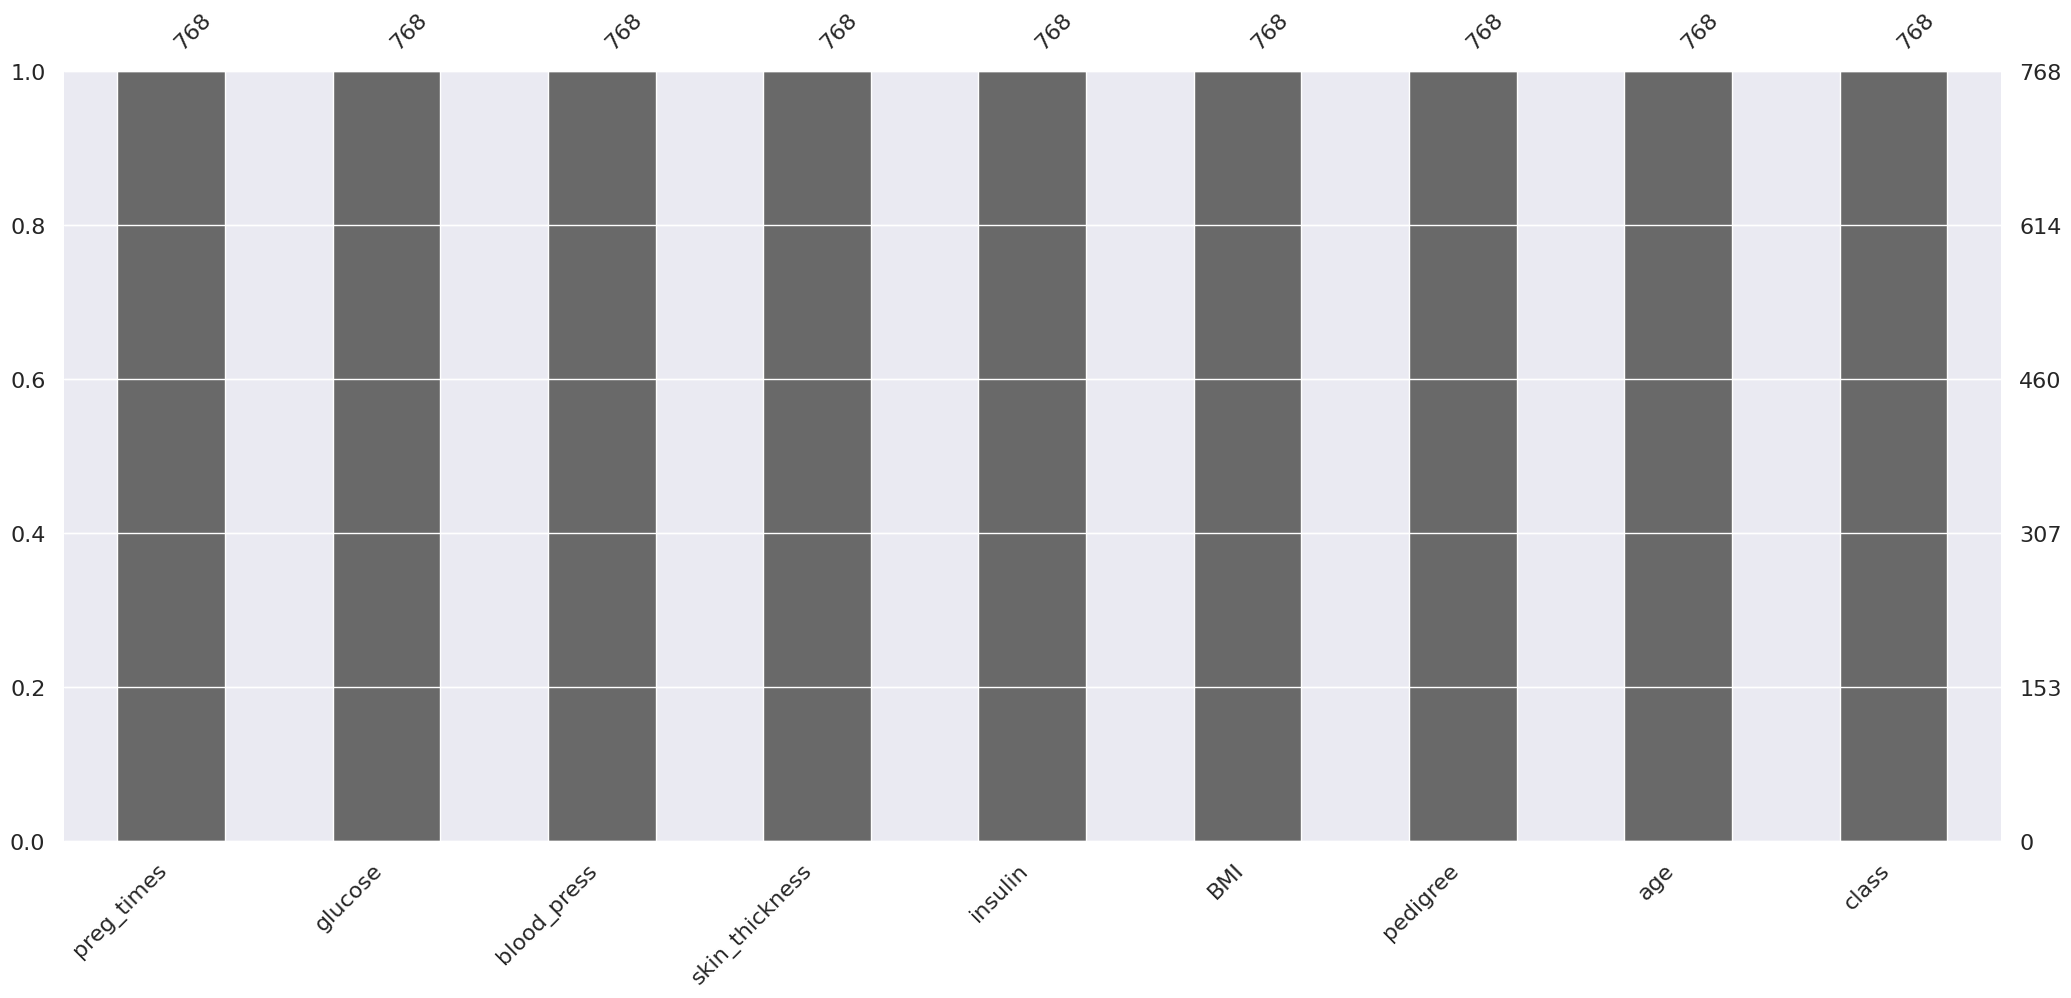

In [11]:
# Cek missing value
plt.figure(figsize=(8, 6))

g_na = msno.bar(df_eda)
plt.show

In [12]:
# Boxplot Sehat vs Diabeter tiap Feature
# Membuat Fungsi Nama Kolom
num_cols = [col for col in df_eda.columns if df_eda[col].dtypes != "O"]
print(f'num_cols: {len(num_cols)}')
num_cols

num_cols: 8


['preg_times',
 'glucose',
 'blood_press',
 'skin_thickness',
 'insulin',
 'BMI',
 'pedigree',
 'age']

<ipython-input-13-f9fad9ebade6>:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g_box = sns.swarmplot(x=df_eda['class'], y=df_eda[col], palette=cols_swamplot)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


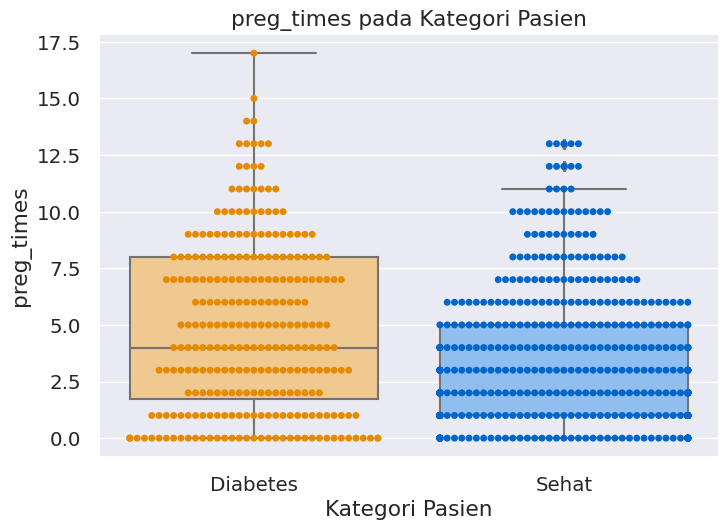

<ipython-input-13-f9fad9ebade6>:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g_box = sns.swarmplot(x=df_eda['class'], y=df_eda[col], palette=cols_swamplot)


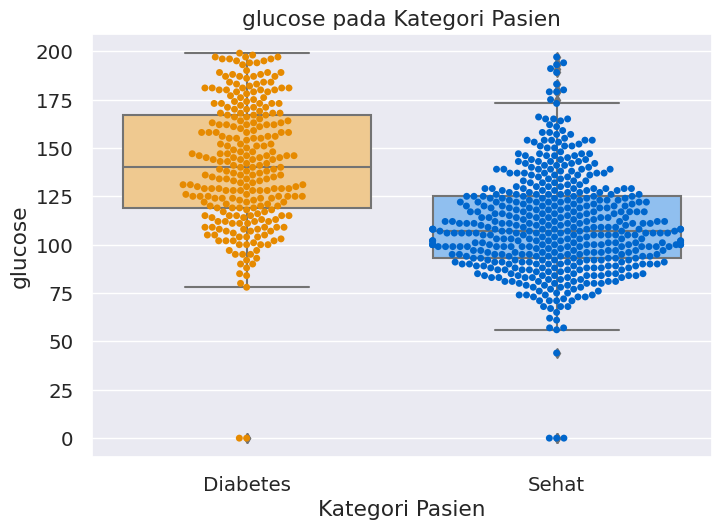

<ipython-input-13-f9fad9ebade6>:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g_box = sns.swarmplot(x=df_eda['class'], y=df_eda[col], palette=cols_swamplot)


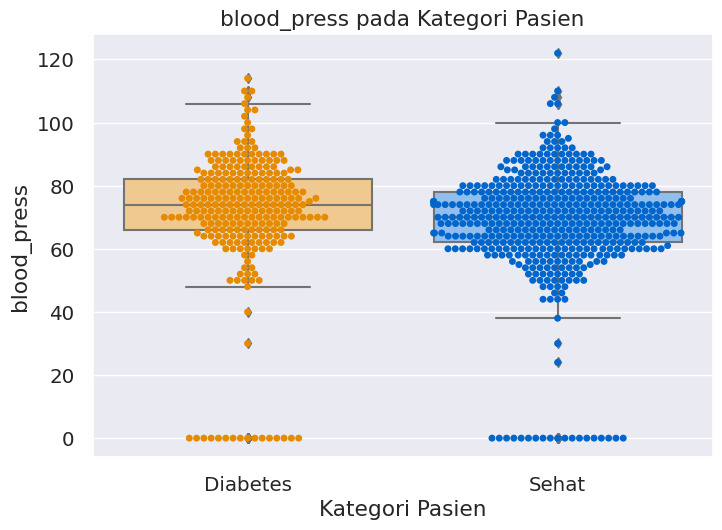

<ipython-input-13-f9fad9ebade6>:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g_box = sns.swarmplot(x=df_eda['class'], y=df_eda[col], palette=cols_swamplot)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 19.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


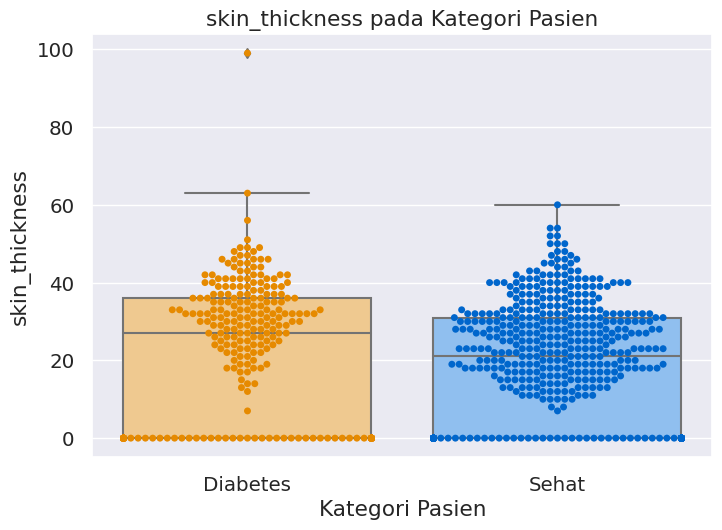

<ipython-input-13-f9fad9ebade6>:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g_box = sns.swarmplot(x=df_eda['class'], y=df_eda[col], palette=cols_swamplot)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 38.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


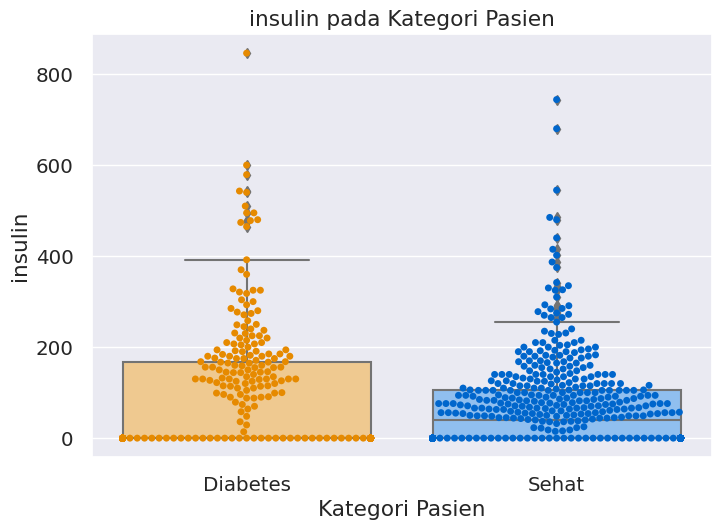

<ipython-input-13-f9fad9ebade6>:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g_box = sns.swarmplot(x=df_eda['class'], y=df_eda[col], palette=cols_swamplot)


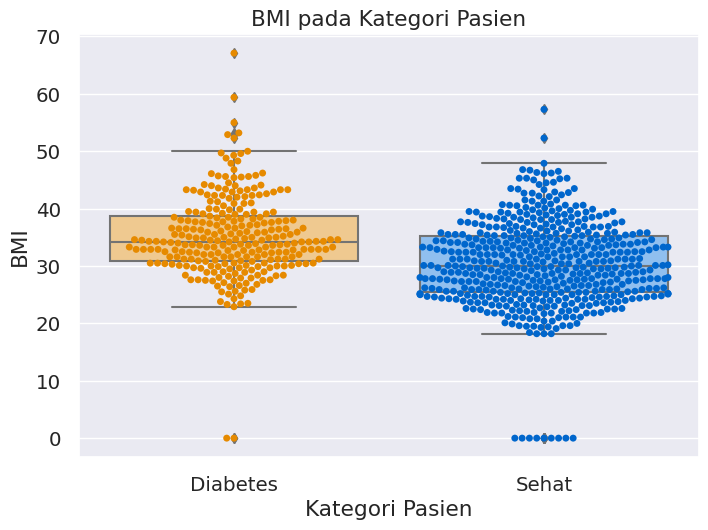

<ipython-input-13-f9fad9ebade6>:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g_box = sns.swarmplot(x=df_eda['class'], y=df_eda[col], palette=cols_swamplot)


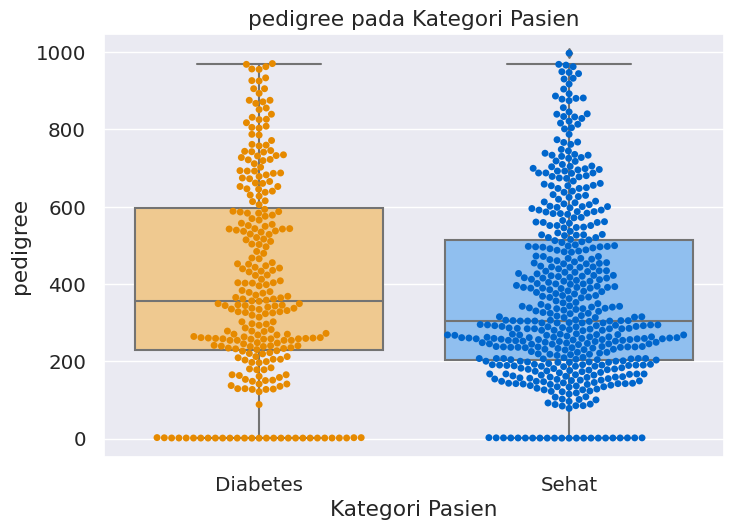

<ipython-input-13-f9fad9ebade6>:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g_box = sns.swarmplot(x=df_eda['class'], y=df_eda[col], palette=cols_swamplot)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


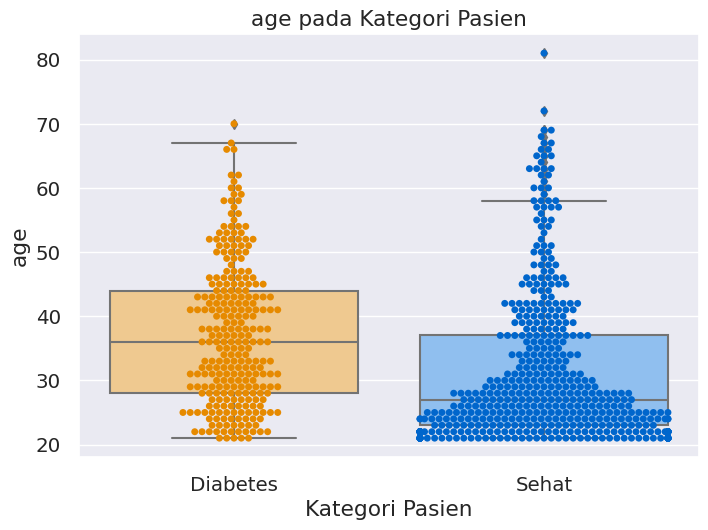

In [13]:
# Membuat palette warna untuk swamplot
cols_boxplot = ["#ffcc80", "#80bfff"]
cols_swamplot = ["#e68a00", "#0066cc"]

# Boxplot hubungan antara feature predictor dengan target
for col in num_cols:
    g_box = sns.boxplot(x=df_eda['class'], y=df_eda[col], palette=cols_boxplot)
    g_box = sns.swarmplot(x=df_eda['class'], y=df_eda[col], palette=cols_swamplot)
    plt.xlabel('Kategori Pasien')
    plt.ylabel(col)
    plt.title(f'{col} pada Kategori Pasien')
    plt.show()




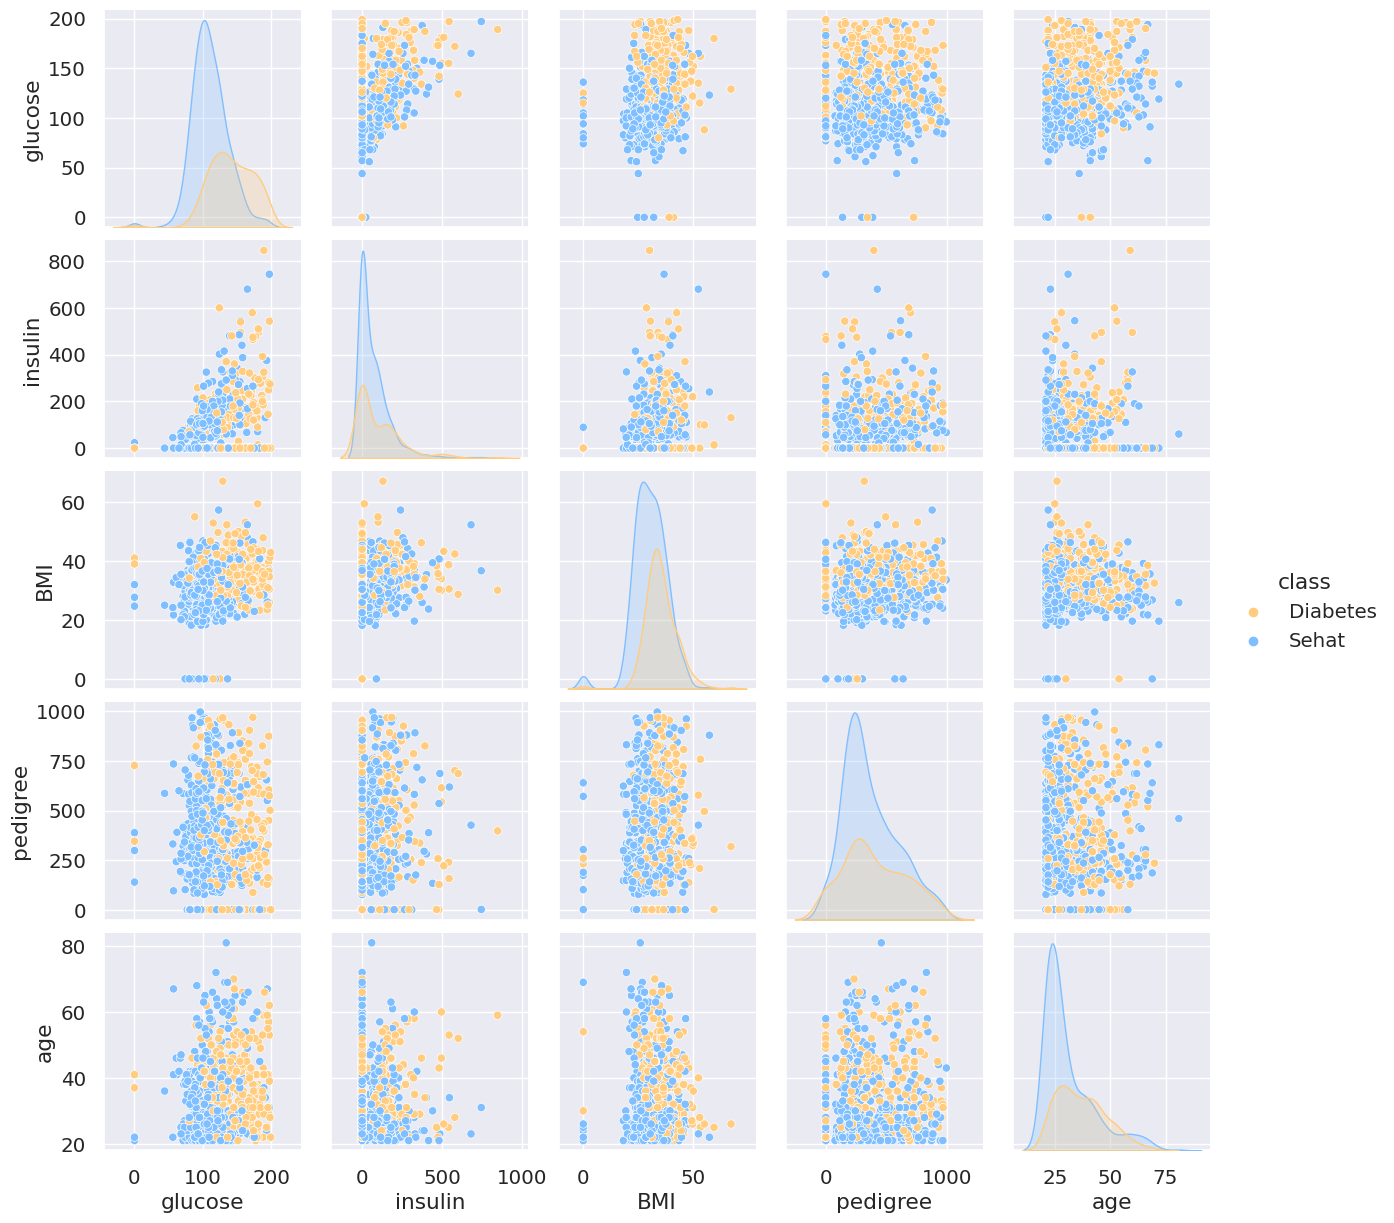

In [14]:
# Pairplot dari Feature Pilihan

# Set ukuran pairplot
#plt.figure(figsize=(20, 20))

# Generate pairplot
g_pair1 = sns.pairplot(data = df_eda, vars = ['glucose', 'insulin', 'BMI', 'pedigree', 'age'], hue = 'class', palette=cols)

plt.show()

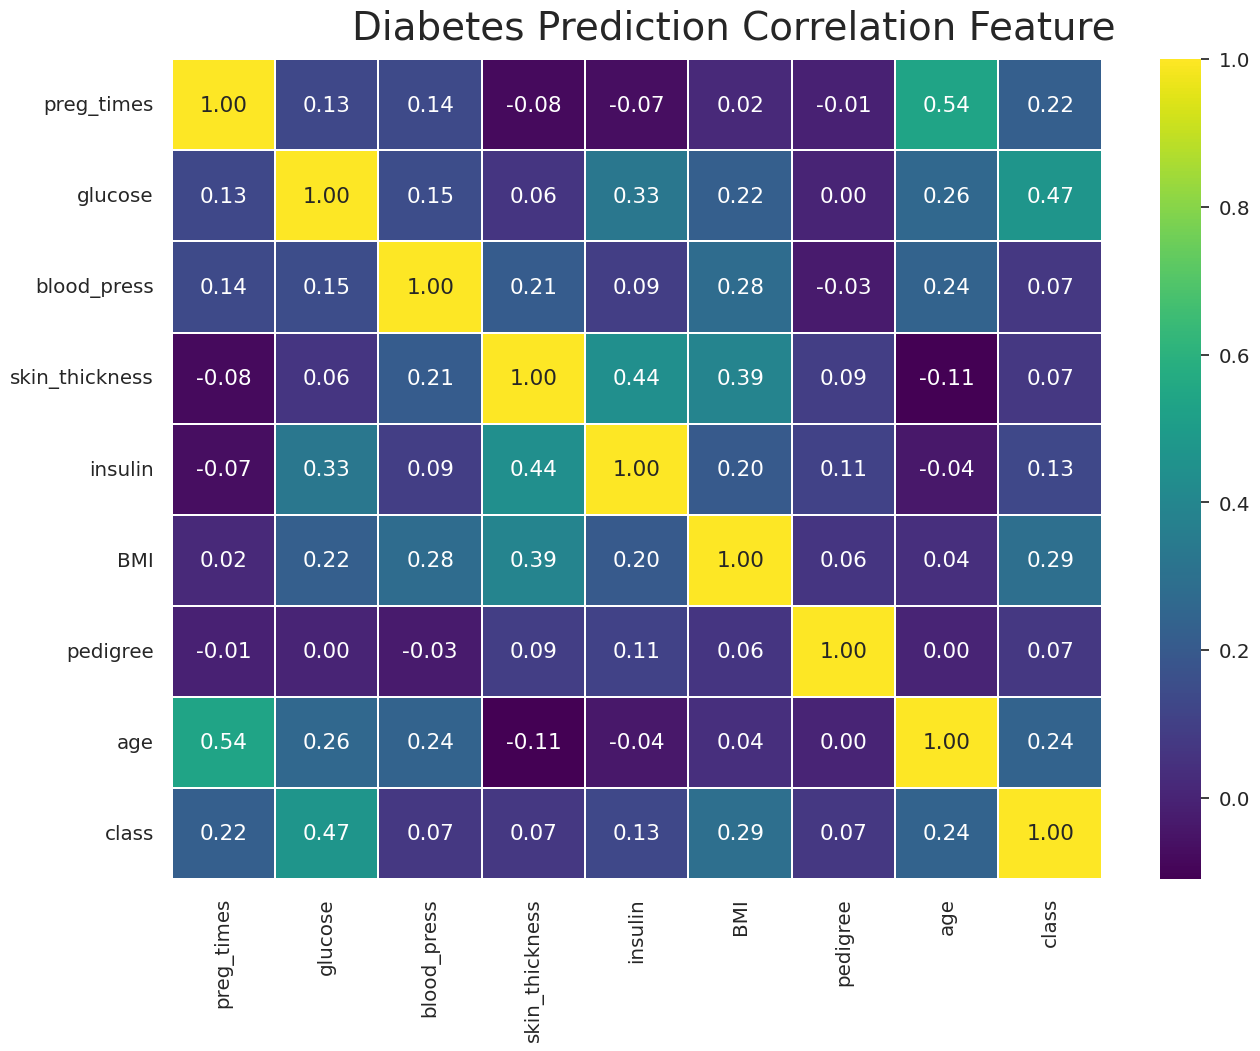

In [15]:
import seaborn as sns
f, ax = plt.subplots(figsize=(15,10))
corr = df_diabetes.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="viridis",fmt='.2f',
                 linewidths=.01)
f.subplots_adjust(top=0.93)
t= f.suptitle('Diabetes Prediction Correlation Feature', fontsize=28)

In [16]:
corr = df_diabetes.corr()
print(corr['class'].sort_values(ascending=True))

blood_press       0.065068
pedigree          0.071462
skin_thickness    0.074752
insulin           0.130548
preg_times        0.221898
age               0.238356
BMI               0.292695
glucose           0.466581
class             1.000000
Name: class, dtype: float64


# Modelling

## Split Dataset

In [17]:
# glocose, BMI, age, pregnancy

In [18]:
eda_df = df_diabetes.loc[:,['glucose','BMI','age','preg_times','class']]
glucose = eda_df["glucose"] > 0
bmi = eda_df["BMI"] > 0
eda_df = eda_df[glucose & bmi]

In [19]:
features = df_diabetes.values[:,:8]
labels = df_diabetes.values[:,8:]

In [20]:
features.shape , labels.shape

((768, 8), (768, 1))

In [21]:
X_train, X_test,Y_train,Y_test=train_test_split(features,labels,test_size=0.2, random_state=42)

In [22]:
X_train.shape

(614, 8)

In [23]:
X_test.shape

(154, 8)

## Define Model

In [24]:
# Model 1 pada semua data

model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu')) # input layer + 1st hidden layer
model.add(Dense(16, activation='relu')) # 2nd hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [25]:
# fit the keras model on the dataset

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_all_data = model.fit(X_train, Y_train, epochs=200, batch_size=2)

Epoch 1/200
307/307 [==============================] - 3s 3ms/step - loss: 4.9756 - accuracy: 0.5717
Epoch 2/200
307/307 [==============================] - 1s 3ms/step - loss: 1.6520 - accuracy: 0.5831
Epoch 3/200
307/307 [==============================] - 1s 3ms/step - loss: 1.5946 - accuracy: 0.6059
Epoch 4/200
307/307 [==============================] - 1s 4ms/step - loss: 1.5728 - accuracy: 0.5977
Epoch 5/200
307/307 [==============================] - 1s 3ms/step - loss: 1.2996 - accuracy: 0.6221
Epoch 6/200
307/307 [==============================] - 1s 3ms/step - loss: 1.0445 - accuracy: 0.6287
Epoch 7/200
307/307 [==============================] - 1s 3ms/step - loss: 1.1851 - accuracy: 0.6352
Epoch 8/200
307/307 [==============================] - 1s 3ms/step - loss: 1.4684 - accuracy: 0.6026
Epoch 9/200
307/307 [==============================] - 1s 3ms/step - loss: 1.2567 - accuracy: 0.6417
Epoch 10/200
307/307 [==============================] - 1s 3ms/step - loss: 0.9983 - accura

# Evaluation

## Accuracy, Precision, Recall, F1 Score

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


In [27]:
# Evaluasi model yang dilatih dengan semua data
_, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 70.78


5/5 [==============================] - 0s 2ms/step


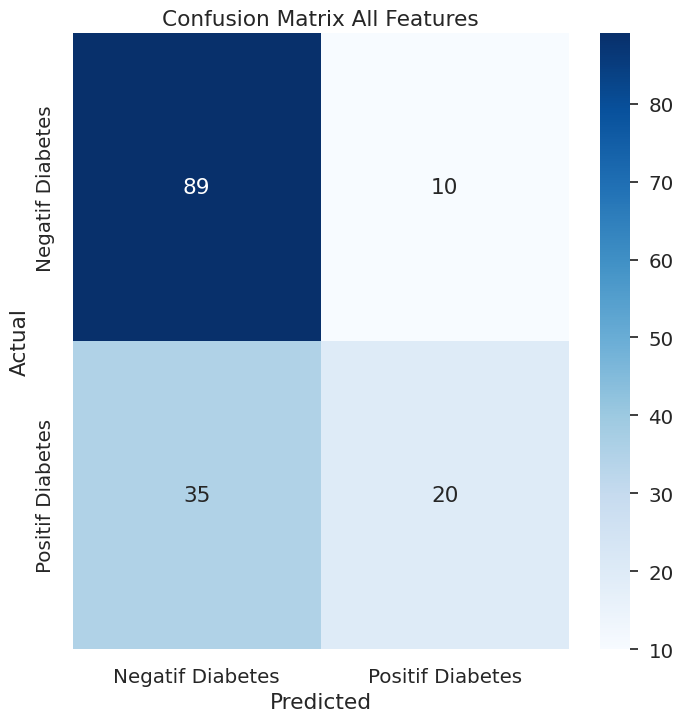

In [28]:
# Confusion matrix pada semua data
predictions = model.predict(X_test)
binary_predictions = np.where(predictions >= 0.5, 1, 0)
cm = confusion_matrix(Y_test, binary_predictions)
class_names = ['Negatif Diabetes', 'Positif Diabetes']
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
plt.figure(figsize=(8, 8))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix All Features')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
# Precision, Recall, F1 pada semua fitur
report = classification_report(Y_test, binary_predictions)
precision = precision_score(Y_test, binary_predictions)
recall = recall_score(Y_test, binary_predictions)
f1 = f1_score(Y_test, binary_predictions)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n",report)

Precision: 0.6666666666666666
Recall: 0.36363636363636365
F1-Score: 0.4705882352941177

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.90      0.80        99
         1.0       0.67      0.36      0.47        55

    accuracy                           0.71       154
   macro avg       0.69      0.63      0.63       154
weighted avg       0.70      0.71      0.68       154



## ROC AUC

### Data Semua Fitur

In [30]:
positive_prob = predictions.flatten()  # Flatten predictions to 1D array


In [31]:
fpr, tpr, thresholds = roc_curve(Y_test, positive_prob)


In [32]:
roc_auc = auc(fpr, tpr)


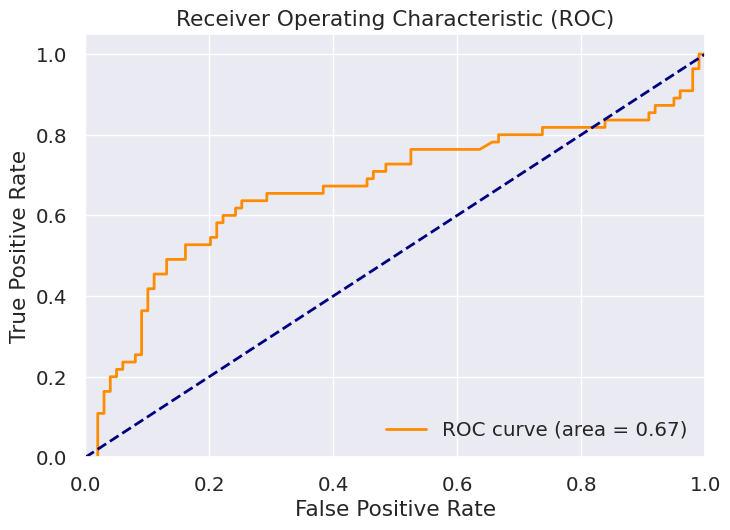

In [33]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

##Model Deployment

In [34]:
model.save("model")
model_loaded =  tf.keras.models.load_model("model")

In [35]:
def norm_a_data(data):
    data[0] = (data[0] - 0)    / (17 - 0)
    data[1] = (data[1] - 0)    / (199 - 0)
    data[2] = (data[2] - 0)    / (122 - 0)
    data[3] = (data[3] - 0)    / (99 - 0)
    data[4] = (data[4] - 0)    / (846 - 0)
    data[5] = (data[5] - 0)    / (67 - 0)
    data[6] = (data[6] - 0.078) / (2 - 0.078)
    data[7] = (data[7] - 21)    / (81 - 21)
    return data[:]

In [36]:
my_data = [6, 148, 72, 35, 0, 33.6, 0.627, 50]
for i in range(40):
    my_data = df_diabetes.iloc[i].values[:8]
    my_data = norm_a_data(my_data)
    my_data=np.array(my_data)
    my_data = my_data.reshape(8,1)
    # pd.DataFrame(my_data, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
    #        'DiabetesPedigreeFunction', 'Age'])
    pred = model_loaded.predict(my_data.transpose())
    pred = float(pred)
    print(pred)
    print(i)
    if pred >= 0.5 :
        print("Kemungkinan anda**" + str("{:.2f}".format(pred*100)) + "%** memiliki diabetes/")
    else:
        print(f"Kemungkinan anda **" + str("{:.2f}".format((1-pred)*100)) + "%** tidak memiliki diabetes")

1/1 [==============================] - 0s 48ms/step
0.045663461089134216
0
Kemungkinan anda **95.43%** tidak memiliki diabetes
1/1 [==============================] - 0s 19ms/step
0.045663461089134216
1
Kemungkinan anda **95.43%** tidak memiliki diabetes
1/1 [==============================] - 0s 20ms/step
0.045663461089134216
2
Kemungkinan anda **95.43%** tidak memiliki diabetes
1/1 [==============================] - 0s 18ms/step
0.045663461089134216
3
Kemungkinan anda **95.43%** tidak memiliki diabetes
1/1 [==============================] - 0s 20ms/step
0.00443726871162653
4
Kemungkinan anda **99.56%** tidak memiliki diabetes
1/1 [==============================] - 0s 17ms/step
0.045663461089134216
5
Kemungkinan anda **95.43%** tidak memiliki diabetes
1/1 [==============================] - 0s 18ms/step
0.045663461089134216
6
Kemungkinan anda **95.43%** tidak memiliki diabetes
1/1 [==============================] - 0s 17ms/step
0.045663461089134216
7
Kemungkinan anda **95.43%** tidak mem